# LOOP 3 - TEST SIMPLE RNN 

In [ ]:
import glob
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/X_train_update.csv',index_col =0)
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/Y_train_CVw08PX.csv',index_col=0)

In [ ]:
y['label'] = y['prdtypecode'].replace(y.prdtypecode.unique(), [*range(len(y.prdtypecode.unique()))]) ## permet de simplifier les N°  de classes

In [ ]:
X.head()

designation  ...     imageid
0  Olivia: Personalisiertes Notizbuch / 150 Seite...  ...  1263597046
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...  ...  1008141237
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...  ...   938777978
3  Peluche Donald - Europe - Disneyland 2000 (Mar...  ...   457047496
4                               La Guerre Des Tuques  ...  1077757786

[5 rows x 4 columns]

In [ ]:
# réalisation de la jointure des 2 colonnes texte du dataframe
headlines = []  #####
for row in range(0,len(X.index)):
    headlines.append(' '.join(str(x) for x in X.iloc[row,0:2]))

In [ ]:
df = pd.DataFrame({'Features': headlines})

In [ ]:
# ajout colonne label
df['label']=y['label']

In [ ]:
# ajout colonne count_word
df["count_word"] = df['Features'].apply(lambda x : len(x.split(' ')))

In [ ]:
df.head(15)

Features  label  count_word
0   Olivia: Personalisiertes Notizbuch / 150 Seite...      0          15
1   Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...      1          40
2   Grand Stylet Ergonomique Bleu Gamepad Nintendo...      2         121
3   Peluche Donald - Europe - Disneyland 2000 (Mar...      3          11
4   La Guerre Des Tuques Luc a des id&eacute;es de...      4          38
5   Afrique Contemporaine N° 212 Hiver 2004 - Doss...      1          12
6      Christof E: Bildungsprozessen Auf Der Spur nan      0           7
7   Conquérant Sept Cahier Couverture Polypro 240 ...      5          32
8       Puzzle Scooby-Doo Avec Poster 2x35 Pieces nan      3           7
9   Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...      6         313
10  Eames Inspired Sxw Chair - Pink - Black The ti...      7         102
11  Fauteuil Chesterfield Brenton 100% Cuir De Buf...      7         665
12  Peaceable Kingdom Wheres Bear? The Hide And Fi...      8         194
13  Paire De Voilages Imprimés Fantaisie Paire de ...      9          84
14  Matelas Mémoire De Forme 180x200 X 20 Cm Très ...      7         319

In [ ]:
  import nltk
  nltk.download('stopwords')
  nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

df.Features = df.Features.apply(lambda x :preprocess_sentence(x))
df.head()

Features  label  count_word
0  olivia personalisiertes notizbuch seiten punkt...      0          15
1  journal des arts art son marche salon art asia...      1          40
2  grand stylet ergonomique bleu gamepad nintendo...      2         121
3  peluche donald europe disneyland marionnette d...      3          11
4  guerre des tuques luc des eacute grandeur . ve...      4          38

In [ ]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_train, y_test = train_test_split(df.Features, df.label, test_size=0.3, random_state=1234)

In [ ]:
X_text_train

65547    carte garbage pail kids les crados card topps ...
76168    helit planchette subdiviision pour bac fiches ...
42338                         siege auto marque runner nan
5412             lot magazines bandes dessinees suivre nan
80800    housse protection silicone avec couverture cas...
                               ...                        
32399                                      physiophile nan
82584    film solaire piscine ronde bleu film solaire p...
60620                    decalcomanies jabo superscale nan
34086    eva yoga pilates cork bloc mousse brique exten...
58067    chaise salle manger grise chaise salle manger ...
Name: Features, Length: 59441, dtype: object

In [ ]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_text_train)

In [ ]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [ ]:
# Transformation en séquences de nombres entier
X_train = tokenizer.texts_to_sequences(X_text_train)
X_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Transformation en tableau numpy 
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
opt = Adam(lr=0.0007)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# LOOP 3-4

In [ ]:
# Modèle RNN simple
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout, Bidirectional, LSTM
embedding_dim = 200 

model = Sequential()
model.add(Embedding(10000, 10000))
#model.add(Bidirectional(RNN(GRUCell(128, recurrent_initializer = 'glorot_uniform'))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.30))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.37))
model.add(Dense(27, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
    batch_size = 64,
    epochs=5,
    validation_data = (X_test, y_test))

Epoch 1/5
929/929 [==============================] - 1495s 2s/step - loss: 1.4714 - accuracy: 0.5680 - val_loss: 0.8215 - val_accuracy: 0.7526
Epoch 2/5
929/929 [==============================] - 1471s 2s/step - loss: 0.6897 - accuracy: 0.7930 - val_loss: 0.7347 - val_accuracy: 0.7792
Epoch 3/5
929/929 [==============================] - 1467s 2s/step - loss: 0.5106 - accuracy: 0.8436 - val_loss: 0.7453 - val_accuracy: 0.7815
Epoch 4/5
929/929 [==============================] - 1466s 2s/step - loss: 0.4145 - accuracy: 0.8707 - val_loss: 0.7891 - val_accuracy: 0.7786
Epoch 5/5
929/929 [==============================] - 1464s 2s/step - loss: 0.3593 - accuracy: 0.8857 - val_loss: 0.8136 - val_accuracy: 0.7812


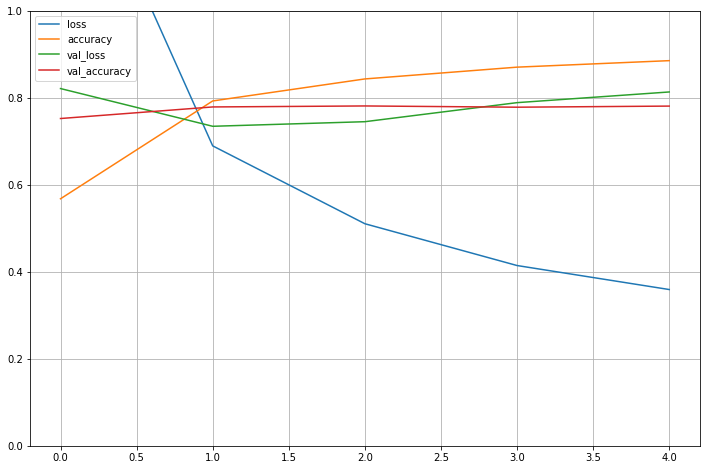

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# LOOP 3-5

In [ ]:
import spacy

In [ ]:
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)
    return w

def tokenize_spacy(sentence):
    global spacynlp
    if spacynlp is None:
        spacynlp = spacy.load("fr_core_news_sm")
        spacynlp.disable_pipes ('tagger', 'parser', 'ner')
    
    w = [x.lemma_ for x in spacynlp(w)]
    return w

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()


In [ ]:
df.Features = df.Features.apply(lambda x :preprocess_sentence(x))
df.head()

Features  label  count_word
0  olivia personalisiertes notizbuch seiten punkt...      0          15
1  journal des arts     art  son marche salon  ar...      1          40
2  grand stylet ergonomique bleu gamepad nintendo...      2         121
3  peluche donald europe disneyland marionnette  ...      3          11
4   guerre des tuques luc  des  eacute   grandeur...      4          38

In [ ]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, y_train, y_test = train_test_split(df.Features, df.label, test_size=0.3, random_state=1234)

In [ ]:
import tensorflow as tf
# Définition du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
# Mettre à jour le dictionnaire du tokenizer
tokenizer.fit_on_texts(X_text_train)

In [ ]:
# Définition des dictionnaires
word2idx = tokenizer.word_index
idx2word = tokenizer.index_word
vocab_size = tokenizer.num_words

In [ ]:
from keras.layers import Embedding #### doute
embedding_layer = Embedding (10000,512)

In [ ]:
# Transformation en séquences de nombres entier
X_train = tokenizer.texts_to_sequences(X_text_train)
X_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Transformation en tableau numpy 
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks

In [ ]:
import os
cwd = os.getcwd()
filepath = cwd

checkpoint = callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_loss', save_best_only = True, save_weights_only = False,
                                       mode = 'min', save_freq = 'epoch')

In [ ]:
def decreasinglrUpdate(epoch,learning_rate):
    if epoch % 3 == 0:
        return learning_rate * 0.1
    else: 
        return learning_rate
    
lrScheduler = callbacks.LearningRateScheduler(schedule = decreasinglrUpdate, verbose = 1)

In [ ]:
https://www.machinecurve.com/index.php/2020/01/23/how-to-use-l1-l2-and-elastic-net-regularization-with-keras/

In [ ]:
https://keras.io/api/layers/regularizers/

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout, Bidirectional, LSTM
embedding_dim = 200 

model = Sequential()
model.add(Embedding(10000, 10000))
#model.add(Bidirectional(RNN(GRUCell(128, recurrent_initializer = 'glorot_uniform'))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.30))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.37))
model.add(Dense(27, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
opt = Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history2 = model.fit(X_train, y_train,  ### ERREUR SUR LE MODELE 
    batch_size = 64,
    epochs=5,
    validation_data = (X_test, y_test),
    callbacks = [lrScheduler,checkpoint])

Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.00010000000474974513.
929/929 [==============================] - 1476s 2s/step - loss: 0.2570 - accuracy: 0.9200 - val_loss: 0.8439 - val_accuracy: 0.7868


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 2/5

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00010000000474974513.
929/929 [==============================] - 1470s 2s/step - loss: 0.2129 - accuracy: 0.9342 - val_loss: 0.8730 - val_accuracy: 0.7885
Epoch 3/5

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00010000000474974513.
929/929 [==============================] - 1468s 2s/step - loss: 0.1902 - accuracy: 0.9416 - val_loss: 0.9018 - val_accuracy: 0.7892
Epoch 4/5

Epoch 00004: LearningRateScheduler reducing learning rate to 1.0000000474974514e-05.
929/929 [==============================] - 1466s 2s/step - loss: 0.1669 - accuracy: 0.9494 - val_loss: 0.9079 - val_accuracy: 0.7896
Epoch 5/5

Epoch 00005: LearningRateScheduler reducing learning rate to 1.0000000656873453e-05.
929/929 [==============================] - 1472s 2s/step - loss: 0.1636 - accuracy: 0.9516 - val_loss: 0.9137 - val_accuracy: 0.7895


In [ ]:
history3 = model.fit(X_train, y_train,  ### ERREUR SUR LE MODELE 
    batch_size = 64,
    epochs=5,
    validation_data = (X_test, y_test),
    callbacks = [lrScheduler,checkpoint])

Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to 9.999999747378752e-06.
929/929 [==============================] - 1306s 1s/step - loss: 3.1417 - accuracy: 0.1122 - val_loss: 3.0943 - val_accuracy: 0.1250


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 2/5

Epoch 00002: LearningRateScheduler reducing learning rate to 9.999999747378752e-06.
929/929 [==============================] - 1301s 1s/step - loss: 3.1018 - accuracy: 0.1207 - val_loss: 3.0548 - val_accuracy: 0.1258


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 3/5

Epoch 00003: LearningRateScheduler reducing learning rate to 9.999999747378752e-06.
929/929 [==============================] - 1302s 1s/step - loss: 2.8765 - accuracy: 0.1750 - val_loss: 2.5762 - val_accuracy: 0.2451


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 4/5

Epoch 00004: LearningRateScheduler reducing learning rate to 9.999999747378752e-07.
929/929 [==============================] - 1302s 1s/step - loss: 2.6128 - accuracy: 0.2318 - val_loss: 2.5552 - val_accuracy: 0.2737


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 5/5

Epoch 00005: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
929/929 [==============================] - 1301s 1s/step - loss: 2.5997 - accuracy: 0.2314 - val_loss: 2.5419 - val_accuracy: 0.2916


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


# LOOP 3.6  -> test regularizers  l2  (0.001 KO)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout, Bidirectional, LSTM
embedding_dim = 200 

model = Sequential()
model.add(Embedding(10000, 10000))
#model.add(Bidirectional(RNN(GRUCell(128, recurrent_initializer = 'glorot_uniform'))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, activation='relu')#, kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))) ####
model.add(Dropout(0.25))
model.add(Dense(27, activation='softmax'))

SyntaxError: ignored

In [ ]:
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
history7 = model.fit(X_train, y_train,  
    batch_size = 64,
    epochs=5,
    validation_data = (X_test, y_test),
    callbacks = [lrScheduler,checkpoint])

Epoch 1/5

Epoch 00001: LearningRateScheduler reducing learning rate to 9.999999747378752e-06.
929/929 [==============================] - 1305s 1s/step - loss: 3.5096 - accuracy: 0.1183 - val_loss: 3.4450 - val_accuracy: 0.1244


INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


Epoch 2/5

Epoch 00002: LearningRateScheduler reducing learning rate to 9.999999747378752e-06.
 53/929 [>.............................] - ETA: 17:56 - loss: 3.4728 - accuracy: 0.1221

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(history22.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

# LOOP 3.7

In [ ]:
## tests de réglages/paramétrage de l'embedding

In [ ]:
from tqdm import tqdm
textn=''
for elt in tqdm(df.Features):
  textn+=elt

In [ ]:
vocab = sorted(list(set(textn)))  # embedding [len (vocab), len(vocab)]

In [ ]:
# ou

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, filters='')
tokenizer.fit_on_texts(df.Features)

embedding_dim = 512 #256
voc_size_inp = len (tokenizer.word_counts) + 1


... Embedding (voc_size_inp, embedding_dim)


